In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio

# Open merged label CSV
Open the files we made in the Data_extraction jupyter notebook.

In [46]:
labels=pd.read_csv("/Users/anaraquelpengelly/Desktop/MSC_health_data_science/term_2/machine_learning/project_malaria/Malaria_blood_image_classification/labels.csv")
paras=pd.read_csv("/Users/anaraquelpengelly/Desktop/MSC_health_data_science/term_2/machine_learning/project_malaria/Malaria_blood_image_classification/lab_parasited.csv")
uninfect=pd.read_csv( "/Users/anaraquelpengelly/Desktop/MSC_health_data_science/term_2/machine_learning/project_malaria/Malaria_blood_image_classification/lab_uninfected.csv")

In [38]:
labels.tail()

,Unnamed: 0,0,infect_status
27428,15386,C99P60ThinF_IMG_20150918_142128_cell_47.png,0
27429,15387,C99P60ThinF_IMG_20150918_142128_cell_52.png,0
27430,15388,C99P60ThinF_IMG_20150918_142128_cell_53.png,0
27431,15389,C99P60ThinF_IMG_20150918_142128_cell_55.png,0
27432,15390,C99P60ThinF_IMG_20150918_142128_cell_56.png,0


In [8]:

paras.shape

(13722, 3)

In [9]:
paras.head()

,Unnamed: 0,0,infect_status
0,0,C101P62ThinF_IMG_20150918_151006_cell_61.png,1
1,1,C101P62ThinF_IMG_20150918_151006_cell_62.png,1
2,2,C101P62ThinF_IMG_20150918_151006_cell_63.png,1
3,3,C101P62ThinF_IMG_20150918_151006_cell_64.png,1
4,4,C101P62ThinF_IMG_20150918_151006_cell_65.png,1


In [26]:
#now function to select and load 5 images for each label

#make new function !!! 
def image_selector(selection, df, num, label, path):
    sum_=0 
    row_list_=[]
    for index, row in df.iterrows():
        if row["infect_status"]== selection:
            sum_+=1
            row_list_.append(row["0"])
            if sum_==num:
                break 
    offset= 0 if num%3==0 else 1
    fig, axes = plt.subplots(nrows = (int(num/3)+offset), ncols=3, figsize=(10, 10))
    fig.suptitle('{} images'.format(label), fontsize=15, y=0.995)
    for i, ax in zip(range(sum_), axes.flatten()):
        im = imageio.imread((path+label+"/"+"{}").format(row_list_[i]))
        title='image size: {}'.format(im.shape)              
        ax.set_title(title)
        ax.imshow(im)
        if offset == 1:
            x=(round(num/3)-1) if num%3==2 else (round(num/3)) if num%3==1 else None
            y= 2 if num%3==2 else 1 if num%3==1 else None
            z=y+1 if num%3==1 else None
            axes[x,y].set_axis_off()
            if z!=None:
                axes[x,z].set_axis_off()
        plt.tight_layout()


In [10]:
path="/Users/anaraquelpengelly/Desktop/MSC_health_data_science/term_2/machine_learning/project_malaria/Malaria_blood_image_classification/cell_images/"


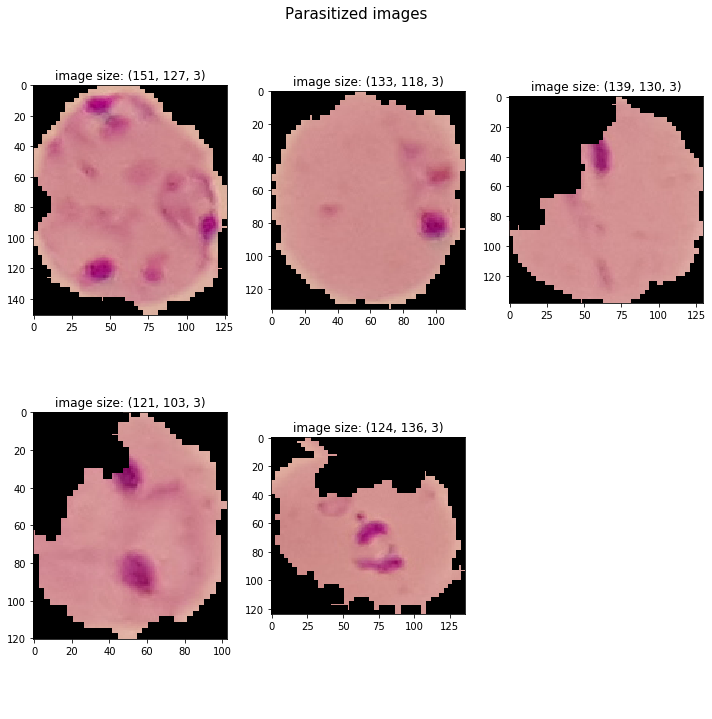

In [27]:
image_selector(selection=1, df=paras, num=5, label="Parasitized", path=path)

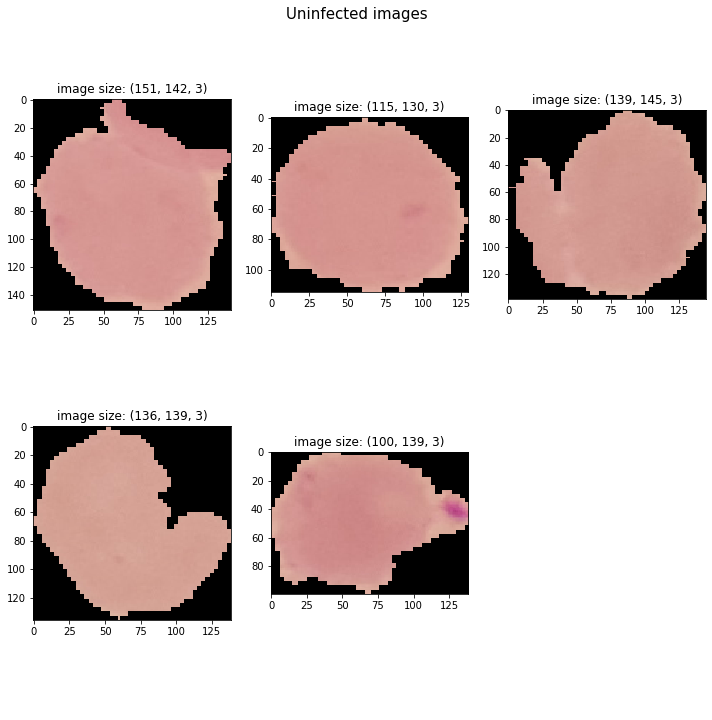

In [28]:
image_selector(selection=0, df=uninfect,num=5, label="Uninfected", path=path)

The function would not work before and because there was a space before the name of each image except the first one! so I did str. replace all empty spaces in the column name! Took me quite a while to debug! Now everything is in order as you can see below: 

In [43]:
paras["0"]=paras["0"].str.replace(" ", "")
uninfect["0"]=uninfect["0"].str.replace(" ", "")

In [47]:
label="Parazited"
num=5
sum_=0 
row_list_=[]
selection=0
for index, row in labels.iterrows():
    if row["infect_status"]== selection:
        sum_+=1
        row_list_.append(row["0"])
        if sum_==num:
            break 
print(row_list_)            
    
#im = imageio.imread((path+label+"/"+"{}").format(row_list_[i]))

['C101P62ThinF_IMG_20150918_151006_cell_17.png', 'C101P62ThinF_IMG_20150918_151006_cell_29.png', 'C101P62ThinF_IMG_20150918_151006_cell_32.png', 'C101P62ThinF_IMG_20150918_151006_cell_53.png', 'C101P62ThinF_IMG_20150918_151006_cell_56.png']


Now that we can see the images, they look like they are differnt sizes. 
1. Is that true? Yes, it is, we can tell by adding as a title each image's shape.
2. If it is true, does it affect our analysis? I don't know, I hope not!